<b>United States COVID-19 Cases and Deaths by State

Date generated: Sat Oct 31 2020 17:39:10 GMT-0700 (Pacific Daylight Time)

In [1]:
import pandas as pd
import datetime as dt
import seaborn as sea
import matplotlib.pyplot as plt

In [2]:
cspud = pd.read_csv("COVID-19_Case_Surveillance_Public_Use_Data.csv", 
                    dtype={"cdc_report_dt": "string", "pos_spec_dt": "string","onset_dt": "string",
                           "current_status": "string","sex": "string","age_group": "string",
                           "Race and ethnicity '('combined)": "string","hosp_yn": "string","icu_yn": "string",
                           "death_yn": "string","medcond_yn": "string"})

In [3]:
cspud.head(3)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
0,2020/03/22,2020/03/15,2020/03/11,Laboratory-confirmed case,Female,0 - 9 Years,"Multiple/Other, Non-Hispanic",Yes,Yes,No,Yes
1,2020/03/23,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Unknown,Unknown,Unknown,Unknown
2,2020/03/15,2020/03/15,<NA>,Laboratory-confirmed case,Female,0 - 9 Years,Unknown,Missing,Missing,Missing,Missing


In [4]:
cspud.tail(3)

,cdc_report_dt,pos_spec_dt,onset_dt,current_status,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
4481059,2020/09/15,2020/09/15,<NA>,Laboratory-confirmed case,Female,Unknown,Unknown,Missing,Missing,Missing,No
4481060,2020/09/15,2020/09/15,<NA>,Probable Case,Missing,Unknown,"White, Non-Hispanic",No,Unknown,No,Yes
4481061,2020/09/15,2020/09/17,2020/09/15,Laboratory-confirmed case,Female,Unknown,Unknown,No,Unknown,No,Unknown


In [8]:
invalidAgeEntry =0
for nas,csa in zip(cspud['age_group'].isna(),cspud['age_group']):
    if(nas):
        invalidAgeEntry +=1
invalidAgeEntry

93

In [9]:
ageGroup = cspud['age_group']
covidStatus = cspud['current_status']
deathStatus = cspud['death_yn']
ageGroupNA = ageGroup.isna()

ageGroups = ["0 - 9 Years", "10 - 19 Years", "20 - 29 Years", "30 - 39 Years", "40 - 49 Years", "50 - 59 Years", "60 - 69 Years", "70 - 79 Years", "80+ Years", "Unknown"]

byAge = [0] * len(ageGroups)

for ard,ardna in zip(ageGroup, ageGroupNA):
    if(ardna == False):
        for ag in ageGroups:
            if(ard == ag):
                byAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,byAge):
    print (ags, ':', dba)

totalByAge = sum(byAge)

print ('Total Entries: ', totalByAge)

0 - 9 Years : 140213
10 - 19 Years : 386579
20 - 29 Years : 869057
30 - 39 Years : 748175
40 - 49 Years : 694670
50 - 59 Years : 671827
60 - 69 Years : 468486
70 - 79 Years : 263186
80+ Years : 233588
Unknown : 5188
Total Entries:  4480969


In [10]:
casesByAge = [0] * len(ageGroups)

for ard,ardna,cs in zip(ageGroup, ageGroupNA, covidStatus):
    if(ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                casesByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,casesByAge):
    print (ags, ':', dba)

totalCasesByAge = sum(casesByAge)

print ('Total Laboratory-confirmed cases: ', totalCasesByAge)

0 - 9 Years : 134620
10 - 19 Years : 369617
20 - 29 Years : 843783
30 - 39 Years : 725600
40 - 49 Years : 670109
50 - 59 Years : 643723
60 - 69 Years : 448799
70 - 79 Years : 254304
80+ Years : 227246
Unknown : 4844
Total Laboratory-confirmed cases:  4322645


In [11]:
probableCasesByAge = [0] * len(ageGroups)

for ard,ardna,cs in zip(ageGroup, ageGroupNA, covidStatus):
    if(ardna == False and cs == 'Probable Case'):
        for ag in ageGroups:
            if(ard == ag):
                probableCasesByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,probableCasesByAge):
    print (ags, ':', dba)

totalProbableCasesByAge = sum(probableCasesByAge)

print ('Total Probable cases: ', totalProbableCasesByAge)

0 - 9 Years : 5593
10 - 19 Years : 16962
20 - 29 Years : 25274
30 - 39 Years : 22575
40 - 49 Years : 24561
50 - 59 Years : 28104
60 - 69 Years : 19687
70 - 79 Years : 8882
80+ Years : 6342
Unknown : 344
Total Probable cases:  158324


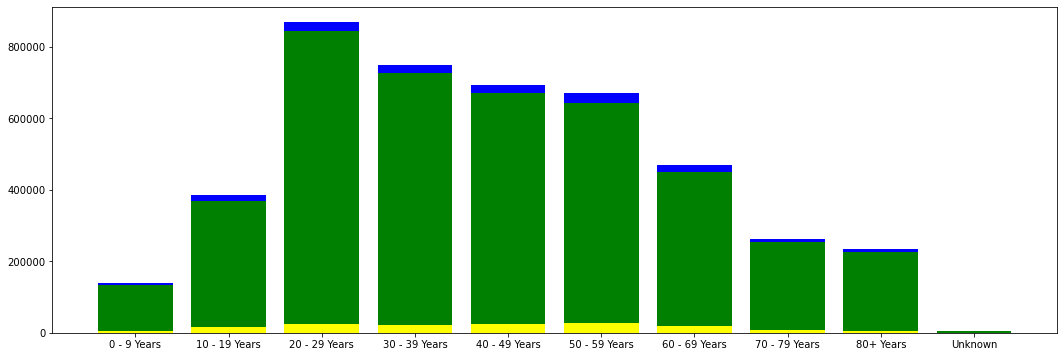

In [12]:
plt.figure(figsize=(18,6))

plt.bar(ageGroups, byAge, color='blue') #Entry
plt.bar(ageGroups, casesByAge, color='green') #Lab-confirmed
plt.bar(ageGroups, probableCasesByAge, color='yellow') #Probable

plt.show()

In [13]:


##Tab up entries with that resulted in death by age group.

deathsByAge = [0] * len(ageGroups)

for d,ard,ardna in zip(deathStatus, ageGroup, ageGroupNA):
    if(d == 'Yes' and ardna == False):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,deathsByAge):
    print (ags, ':', dba)

totalDeathsByAge = sum(deathsByAge)

print ('Total Deaths: ', totalDeathsByAge)

0 - 9 Years : 49
10 - 19 Years : 83
20 - 29 Years : 637
30 - 39 Years : 1770
40 - 49 Years : 4263
50 - 59 Years : 11000
60 - 69 Years : 22900
70 - 79 Years : 33526
80+ Years : 62164
Unknown : 8
Total Deaths:  136400


In [14]:


covidDeathsByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidDeathsByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidDeathsByAge):
    print (ags, ':', dba)

totalCovidDeathsByAge = sum(covidDeathsByAge)

print ('Total Covid Deaths: ', totalCovidDeathsByAge)

0 - 9 Years : 47
10 - 19 Years : 81
20 - 29 Years : 605
30 - 39 Years : 1671
40 - 49 Years : 4010
50 - 59 Years : 10338
60 - 69 Years : 21747
70 - 79 Years : 32012
80+ Years : 59014
Unknown : 6
Total Covid Deaths:  129531


In [15]:
comorbidity = cspud['medcond_yn']

##Tab up entries with the same mortality condition.

coMo =0
coMoDeath =0

for c,d in zip(comorbidity, deathStatus):
    if (c == 'Yes'):
        coMo +=1
    if (d == 'Yes' and c == 'Yes'):
            coMoDeath +=1
print('Total Comorbidity Cases: ', coMo, 'Total Comorbidity Deaths: ', coMoDeath)

Total Comorbidity Cases:  567767 Total Comorbidity Deaths:  64598


In [16]:
deathsByAgeCoMo = [0] * len(ageGroups)

for c,d,ard,ardna,cs in zip(comorbidity, deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Yes' and c == "Yes" and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                deathsByAgeCoMo[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,deathsByAgeCoMo):
    print (ags, ':', dba)

coMoDeaths = sum(deathsByAgeCoMo)
coMoDeathRatio = coMoDeaths / totalCovidDeathsByAge

print ('Comorbidity Deaths: ', coMoDeaths, 'Comorbidity Death Percentage: ', (coMoDeathRatio*100))

0 - 9 Years : 11
10 - 19 Years : 28
20 - 29 Years : 218
30 - 39 Years : 688
40 - 49 Years : 1716
50 - 59 Years : 4926
60 - 69 Years : 10718
70 - 79 Years : 15503
80+ Years : 27050
Unknown : 0
Comorbidity Deaths:  60858 Comorbidity Death Percentage:  46.98334761562869


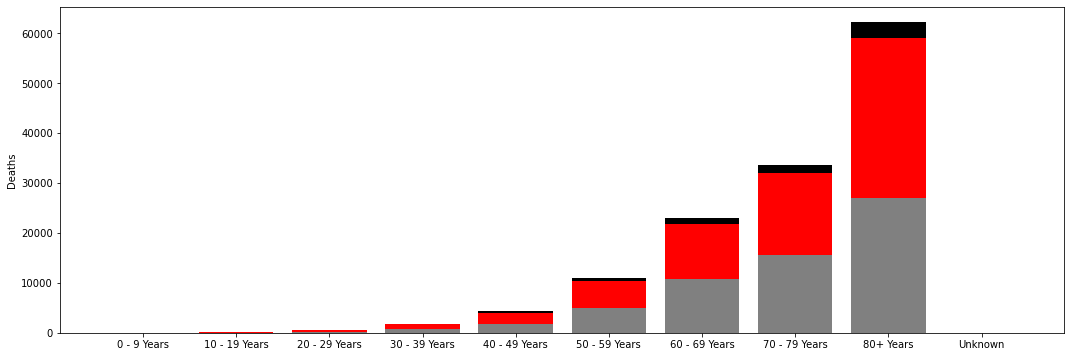

In [17]:
plt.figure(figsize=(18,6))

plt.bar(ageGroups, deathsByAge, color='black')
plt.bar(ageGroups, covidDeathsByAge, color='red')
plt.bar(ageGroups, deathsByAgeCoMo, color='gray')
plt.ylabel('Deaths')
plt.show()

In [18]:
covidSurvivalByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'No' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidSurvivalByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidSurvivalByAge):
    print (ags, ':', dba)

totalCovidSurvivalByAge = sum(covidSurvivalByAge)

print ('Total Covid Survival: ', totalCovidSurvivalByAge)

0 - 9 Years : 73328
10 - 19 Years : 189988
20 - 29 Years : 412421
30 - 39 Years : 352496
40 - 49 Years : 324291
50 - 59 Years : 306283
60 - 69 Years : 206919
70 - 79 Years : 107072
80+ Years : 76671
Unknown : 600
Total Covid Survival:  2050069


In [19]:
covidFatalityRateByAge = [0] * len(ageGroups)

for cs,cd in zip(covidSurvivalByAge, covidDeathsByAge):
    covidFatalityRateByAge[covidSurvivalByAge.index(cs)] = (cd/cs)
    
for ags,dba in zip(ageGroups,covidFatalityRateByAge):
    print (ags, ':', dba)

0 - 9 Years : 0.0006409557058695178
10 - 19 Years : 0.0004263427163820873
20 - 29 Years : 0.0014669476093603381
30 - 39 Years : 0.00474047932458808
40 - 49 Years : 0.012365437215340542
50 - 59 Years : 0.033753097625398736
60 - 69 Years : 0.10509909674800284
70 - 79 Years : 0.29897638971906754
80+ Years : 0.769704321060114
Unknown : 0.01


In [20]:
covidNONCoMoFatalityByAge = [0] * len(ageGroups)

for cd,cmd in zip(covidDeathsByAge, deathsByAgeCoMo):
    covidNONCoMoFatalityByAge[covidDeathsByAge.index(cd)] = cd-cmd
    
for ags,dba in zip(ageGroups,covidNONCoMoFatalityByAge):
    print (ags, ':', dba) 

0 - 9 Years : 36
10 - 19 Years : 53
20 - 29 Years : 387
30 - 39 Years : 983
40 - 49 Years : 2294
50 - 59 Years : 5412
60 - 69 Years : 11029
70 - 79 Years : 16509
80+ Years : 31964
Unknown : 6


In [21]:
covidNONCoMoFatalityRateByAge = [0] * len(ageGroups)

for cs,cd in zip(covidSurvivalByAge, covidNONCoMoFatalityByAge):
    covidNONCoMoFatalityRateByAge[covidSurvivalByAge.index(cs)] = (cd/cs)
    
for ags,dba in zip(ageGroups,covidNONCoMoFatalityRateByAge):
    print (ags, ':', dba)

0 - 9 Years : 0.0004909447959851625
10 - 19 Years : 0.0002789649872623534
20 - 29 Years : 0.0009383615286321502
30 - 39 Years : 0.0027886841269120785
40 - 49 Years : 0.007073893509224739
50 - 59 Years : 0.017669932709291732
60 - 69 Years : 0.053301050169389956
70 - 79 Years : 0.15418596832038253
80+ Years : 0.41689817532052537
Unknown : 0.01


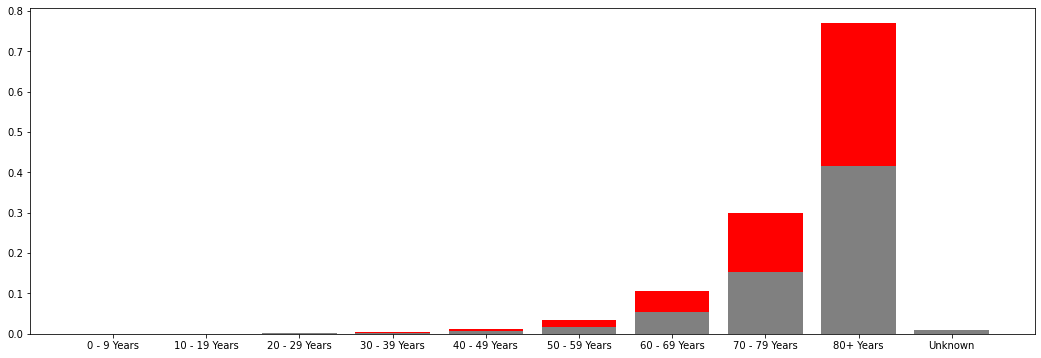

In [22]:
plt.figure(figsize=(18,6))

plt.bar(ageGroups, covidFatalityRateByAge, color='red') #Death w/ Comorbidity
plt.bar(ageGroups, covidNONCoMoFatalityRateByAge, color='gray') #Death w/ NO Comorbidity

plt.show()

In [23]:
##Tab up entries with the same mortality condition.

deaths=0
unknown=0
lived=0
missing=0

for d in deathStatus:
    if(d == 'Yes'):
        deaths +=1
    if(d == 'No'):
        lived +=1
    if(d == 'Unknown'):
        unknown +=1
    if(d == 'Missing'):
        missing +=1
        
total = deaths + missing + unknown + lived
        
print('Deaths: ', deaths, 'Lived: ', lived, 'Uknown: ', unknown, 'Missing: ', missing, 'Total: ', total)

Deaths:  136408 Lived:  2075244 Uknown:  529408 Missing:  1740002 Total:  4481062


In [24]:
mortalityRatio = deaths/ lived 

additionalMissingDeaths = int(mortalityRatio * missing)
additionalUnknownDeaths = int(mortalityRatio * unknown)

print('Mortality Ratio: ', mortalityRatio, 'Deaths adjusted for mortality ratio: ', additionalMissingDeaths + additionalUnknownDeaths + deaths)

Mortality Ratio:  0.06573106584093244 Deaths adjusted for mortality ratio:  285578


In [25]:
covidUnknownByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Unknown' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidUnknownByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidUnknownByAge):
    print (ags, ':', dba)

totalCovidUnknownByAge = sum(covidUnknownByAge)

print ('Total Death Status Unknown: ', totalCovidUnknownByAge)

0 - 9 Years : 14824
10 - 19 Years : 45970
20 - 29 Years : 107421
30 - 39 Years : 86501
40 - 49 Years : 81196
50 - 59 Years : 78794
60 - 69 Years : 54316
70 - 79 Years : 29370
80+ Years : 26003
Unknown : 575
Total Death Status Unknown:  524970


In [56]:
covidAdditionalUnknownDeathsByAge = [0] * len(ageGroups)

for ags,dba,cfr in zip(ageGroups, covidUnknownByAge, covidFatalityRateByAge):
    covidAdditionalUnknownDeathsByAge[covidFatalityRateByAge.index(cfr)] = int(dba*cfr)
    print (ags, ':', int(dba*cfr))
    
totalCovidAdditionalUnknownByAge = sum(covidAdditionalUnknownDeathsByAge)

print ('Total Additional Death Status Unknown: ', totalCovidAdditionalUnknownByAge)

0 - 9 Years : 9
10 - 19 Years : 19
20 - 29 Years : 157
30 - 39 Years : 410
40 - 49 Years : 1004
50 - 59 Years : 2659
60 - 69 Years : 5708
70 - 79 Years : 8780
80+ Years : 20014
Unknown : 5
Total Additional Death Status Unknown:  38765


In [27]:
covidMissingByAge = [0] * len(ageGroups)

for d,ard,ardna,cs in zip(deathStatus, ageGroup, ageGroupNA, covidStatus):
    if(d == 'Missing' and ardna == False and cs == 'Laboratory-confirmed case'):
        for ag in ageGroups:
            if(ard == ag):
                covidMissingByAge[ageGroups.index(ag)] +=1

for ags,dba in zip(ageGroups,covidMissingByAge):
    print (ags, ':', dba)

totalCovidMissingByAge = sum(covidMissingByAge)

print ('Total Death Status Missing: ', totalCovidMissingByAge)

0 - 9 Years : 46421
10 - 19 Years : 133578
20 - 29 Years : 323336
30 - 39 Years : 284932
40 - 49 Years : 260612
50 - 59 Years : 248308
60 - 69 Years : 165817
70 - 79 Years : 85850
80+ Years : 65558
Unknown : 3663
Total Death Status Missing:  1618075


In [55]:
covidAdditionalMissingDeathsByAge = [0] * len(ageGroups)

for ags,dba,cfr in zip(ageGroups, covidMissingByAge, covidFatalityRateByAge):
    covidAdditionalMissingDeathsByAge[covidFatalityRateByAge.index(cfr)] = int(dba*cfr)
    print (ags, ':', int(dba*cfr))
    
totalCovidAdditionalMissingByAge = sum(covidAdditionalMissingDeathsByAge)

print ('Total Additional Death Status Missing: ', totalCovidAdditionalMissingByAge)

0 - 9 Years : 29
10 - 19 Years : 56
20 - 29 Years : 474
30 - 39 Years : 1350
40 - 49 Years : 3222
50 - 59 Years : 8381
60 - 69 Years : 17427
70 - 79 Years : 25667
80+ Years : 50460
Unknown : 36
Total Additional Death Status Missing:  107102


In [108]:
totalCovidAdditionalMissingByAge + totalCovidMissingByAge + totalCovidDeathsByAge

1854708

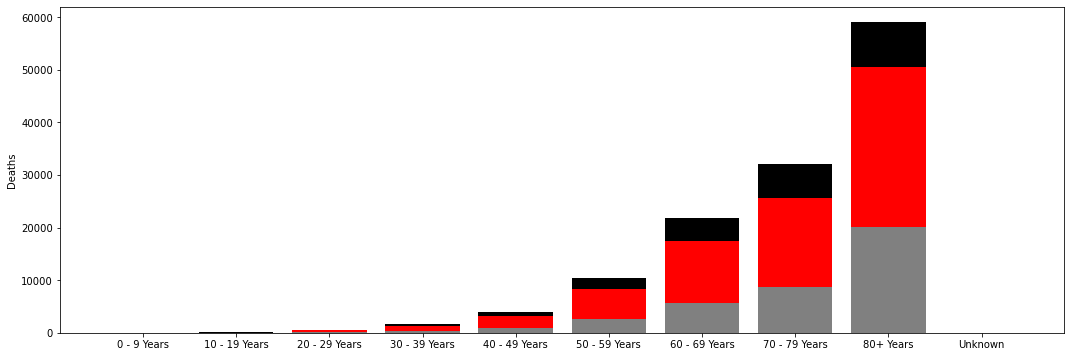

In [65]:
plt.figure(figsize=(18,6))

plt.bar(ageGroups, covidDeathsByAge, color='black')
plt.bar(ageGroups, covidAdditionalMissingDeathsByAge, color='red')
plt.bar(ageGroups, covidAdditionalUnknownDeathsByAge, color='gray')
plt.ylabel('Deaths')
plt.show()

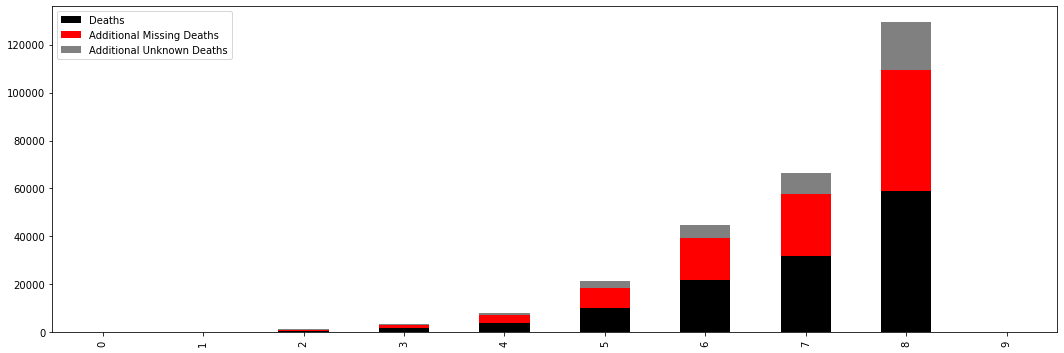

In [48]:
deathFrame=pd.DataFrame(zip(ageGroups, covidDeathsByAge, covidAdditionalMissingDeathsByAge, covidAdditionalUnknownDeathsByAge))

colors = ['black', 'red', 'gray']
lgn = ['Deaths', 'Additional Missing Deaths', 'Additional Unknown Deaths']

ax = deathFrame.plot(kind='bar', stacked=True, color=colors, figsize=(18,6))
ax.legend(lgn)

In [53]:
print ('Additional:', int(totalCovidAdditionalMissingByAge + totalCovidAdditionalUnknownByAge))
print ('Total with Additional:', int(totalCovidAdditionalMissingByAge + totalCovidAdditionalUnknownByAge + totalCovidDeathsByAge))

Additional: 145876
Total with Additional: 275407


In [60]:
initialReportDate = cspud['cdc_report_dt']

initialReportDatetime = [dt.datetime.strptime(x, '%Y/%m/%d') for x in initialReportDate]



In [85]:
covidDeathIRD = []
covidDeathIRDAG = []

initialReportDatetime.sort()

for d,ird,ag,agna,cs in zip(deathStatus, initialReportDatetime, ageGroup, ageGroupNA, covidStatus):
    if (d == 'Yes' and cs == 'Laboratory-confirmed case' and agna == False):
        covidDeathIRD.append(ird)
        covidDeathIRDAG.append(ag)

In [106]:
covidDeathDailyTotalIRD = []
covidDeathDailyIRD = []

tempIRD = None
dailyIRD = 0

for cdird in covidDeathIRD:
    if(tempIRD == None):
        tempIRD = cdird
        dailyIRD = 1
    elif(tempIRD == cdird):
        dailyIRD += 1
    elif(tempIRD != cdird):
        covidDeathDailyIRD.append(cdird)
        covidDeathDailyTotalIRD.append(dailyIRD)
        dailyIRD = 1
        tempIRD = cdird

In [105]:
sum(covidDeathDailyTotalIRD)

126426

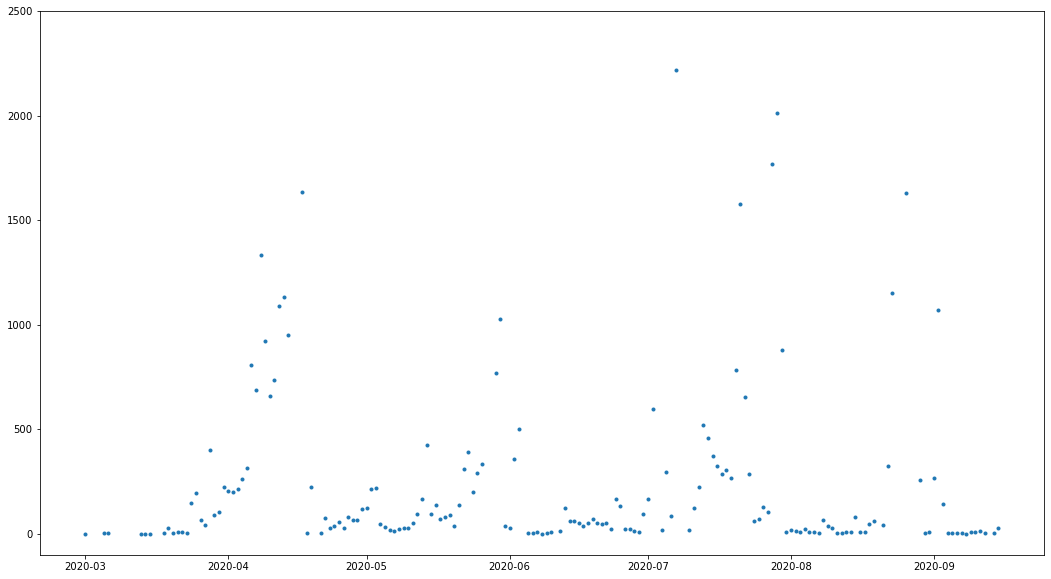

In [107]:
plt.figure(figsize=(18,10))

plt.scatter(covidDeathDailyIRD, covidDeathDailyTotalIRD, marker='.')
plt.ylim(-100,2500)
plt.show()

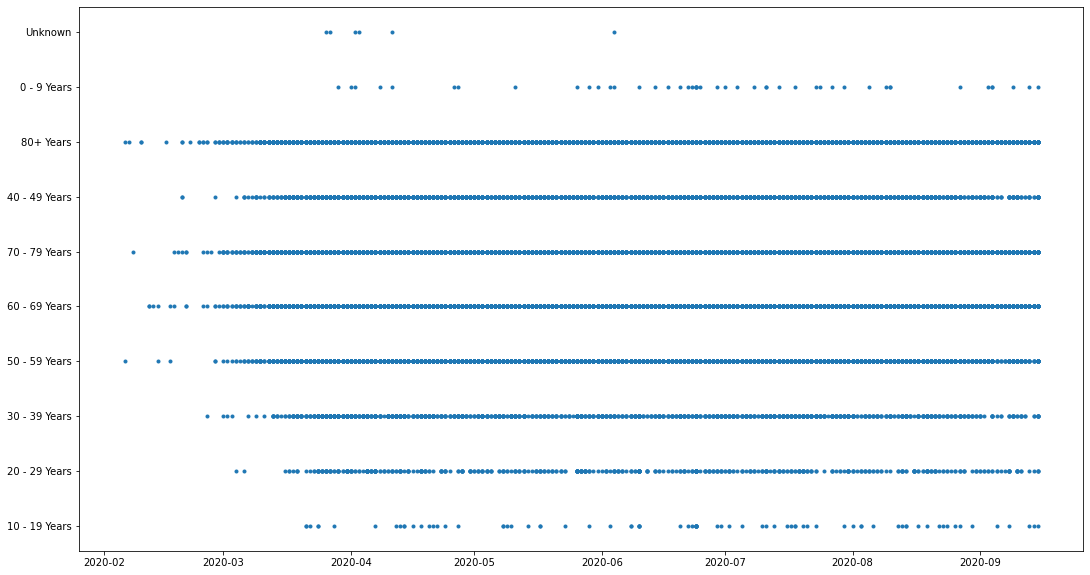

In [69]:
plt.figure(figsize=(18,10))

plt.scatter(covidDeathIRD, covidDeathIRDAG, marker='.')
plt.show()

In [33]:
cdbsot = pd.read_csv("~/Downloads/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv")

cdbsot.head()

,submission_date,state,tot_cases,conf_cases,prob_cases,new_case,pnew_case,tot_death,conf_death,prob_death,new_death,pnew_death,created_at,consent_cases,consent_deaths
0,01/22/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
1,01/23/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
2,01/24/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
3,01/25/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree
4,01/26/2020,CO,0,NaN,NaN,0,NaN,0,NaN,NaN,0,NaN,03/26/2020 04:22:39 PM,Agree,Agree


In [34]:
reportedNewDeaths = cdbsot['new_death']

reportedTotalDeaths = sum(reportedNewDeaths)

reportedTotalDeaths

229109

In [35]:
deathTotalDifference = reportedTotalDeaths - deaths

deathByAgeTotalDifference = reportedTotalDeaths - totalDeathsByAge

print(deathTotalDifference, deathByAgeTotalDifference)

92701 92709


In [36]:
cdbs = pd.read_csv("~/Downloads/united_states_covid19_cases_and_deaths_by_state.csv")

cdbs.head()

,State/Territory,Total Cases,Confirmed Cases,Probable Cases,Cases in Last 7 Days,Case Rate per 100000,Total Deaths,Confirmed Deaths,Probable Deaths,Deaths in Last 7 Days,Death Rate per 100000,Case Rate per 100000 in Last 7 Days,Death Rate per 100K in Last 7 Days
0,Alaska,14837,NaN,NaN,2719,2012,81,NaN,NaN,13,10,52.7,0.3
1,Alabama,190496,162720.0,27776.0,9580,3897,2932,2735.0,197.0,73,59,28.0,0.2
2,Arkansas,110874,NaN,NaN,6739,3679,1900,NaN,NaN,118,63,31.9,0.6
3,American Samoa,0,NaN,NaN,0,0,0,NaN,NaN,0,0,0.0,0.0
4,Arizona,244045,238356.0,5689.0,8163,3403,5934,5641.0,293.0,69,82,16.3,0.1


In [37]:
reportedStateDeaths = cdbs['Total Deaths']

reportedStateTotalDeaths = sum(reportedStateDeaths)

reportedStateTotalDeaths

229109

In [38]:
populationData = pd.read_csv('nst-est2019-alldata.csv')

In [39]:
populationData.head()

,SUMLEV,REGION,DIVISION,STATE,NAME,CENSUS2010POP,ESTIMATESBASE2010,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,...,RDOMESTICMIG2019,RNETMIG2011,RNETMIG2012,RNETMIG2013,RNETMIG2014,RNETMIG2015,RNETMIG2016,RNETMIG2017,RNETMIG2018,RNETMIG2019
0,10,0,0,0,United States,308745538,308758105,309321666,311556874,313830990,...,0.000000,2.493773,2.682083,2.636187,2.921500,3.260435,3.252788,2.871957,2.153911,1.818059
1,20,1,0,0,Northeast Region,55317240,55318443,55380134,55604223,55775216,...,-5.254530,0.887909,-0.038355,-0.469783,-0.986097,-2.061965,-2.490484,-1.837048,-2.134447,-2.859713
2,20,2,0,0,Midwest Region,66927001,66929725,66974416,67157800,67336743,...,-2.365881,-0.963930,-0.973943,-0.006924,-0.762969,-1.388437,-1.241784,-0.557370,-0.922755,-1.111173
3,20,3,0,0,South Region,114555744,114563030,114866680,116006522,117241208,...,3.261349,5.130513,5.850458,5.292073,6.161501,7.277358,7.150074,6.198168,5.225519,5.203720
4,20,4,0,0,West Region,71945553,71946907,72100436,72788329,73477823,...,0.614245,2.723344,3.062896,3.162262,4.026429,4.987285,5.261078,4.021194,3.044951,2.312083


7/1/2019 resident total population estimate

In [40]:
populationData['NAME'][0]

'United States'

In [41]:
population2019 = populationData['POPESTIMATE2019']

In [42]:
population2019[0]

328239523

<b>Citation</b>

-<i>Centers for Disease Control and Prevention, COVID-19 Response. COVID-19 Case Surveillance Public Data Access, Summary, and Limitations (version date: September 30, 2020).